In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('dataset/SalesKaggle3.csv')

In [3]:
def ABC_segmentation(perc):
    '''
    Creates the 3 classes A, B, and C based 
    on quantity percentages (A-60%, B-25%, C-15%)
    '''
    if perc > 0 and perc < 0.6:
        return 'A'
    elif perc >= 0.6 and perc < 0.85:
        return 'B'
    elif perc >= 0.85:
        return 'C'

In [4]:
# take a subset of the data, we need to use the price and the quantity of each item
data_sub = data[['SKU_number','PriceReg','ItemCount','File_Type']][(data['File_Type'] == 'Historical')]
# create the column of the additive cost per SKU
data_sub['AddCost'] = data_sub['PriceReg'] * data_sub['ItemCount']
# order by cumulative cost
data_sub = data_sub.sort_values(by=['AddCost'], ascending=False)
# create the column of the running CumCost of the cumulative cost per SKU
data_sub['RunCumCost'] = data_sub['AddCost'].cumsum()
# create the column of the total sum
data_sub['TotSum'] = data_sub['AddCost'].sum()
# create the column of the running percentage
data_sub['RunPerc'] =  data_sub['RunCumCost']/data_sub['TotSum']
# create the column of the class
data_sub['Class'] = data_sub['RunPerc'].apply(ABC_segmentation)

In [5]:
data_sub.head()

,SKU_number,PriceReg,ItemCount,File_Type,AddCost,RunCumCost,TotSum,RunPerc,Class
685,145889,244.6,851,Historical,208154.6,208154.6,3.426320e+08,0.000608,A
601,435034,281.8,616,Historical,173588.8,381743.4,3.426320e+08,0.001114,A
75056,538479,2645.3,49,Historical,129619.7,511363.1,3.426320e+08,0.001492,A
5752,212633,235.6,521,Historical,122747.6,634110.7,3.426320e+08,0.001851,A
3758,212480,208.8,579,Historical,120895.2,755005.9,3.426320e+08,0.002204,A


In [6]:
# total SKUs for each class
data_sub.Class.value_counts()

C    37413
B    22288
A    16295
Name: Class, dtype: int64

In [7]:
# total cost per class
print ('Cost of Class A :', data_sub[data_sub.Class == 'A']['AddCost'].sum())
print ('Cost of Class B :', data_sub[data_sub.Class == 'B']['AddCost'].sum())
print ('Cost of Class C :', data_sub[data_sub.Class == 'C']['AddCost'].sum())

Cost of Class A : 205577451.4
Cost of Class B : 85658215.25999999
Cost of Class C : 51396361.129999995


In [8]:
# percent of total cost per class
print ('Percent of Cost of Class A :', data_sub[data_sub.Class == 'A']['AddCost'].sum()/data_sub['AddCost'].sum())
print ('Percent of Cost of Class B :', data_sub[data_sub.Class == 'B']['AddCost'].sum()/data_sub['AddCost'].sum())
print ('Percent of Cost of Class C :', data_sub[data_sub.Class == 'C']['AddCost'].sum()/data_sub['AddCost'].sum())

Percent of Cost of Class A : 0.5999948479013728
Percent of Cost of Class B : 0.2500006079773141
Percent of Cost of Class C : 0.15000454412131298


# Summarize Results
The following table includes summary results of the three different classes.

Class	Total SKUs	Total Cost ($)	Quantity Percentage	Cost Percentage
A	16295	205577451	21%	60%
B	22288	85658215	30%	25%
C	37413	51396361	49%	15%
Total	75996	342632027	100%	100%

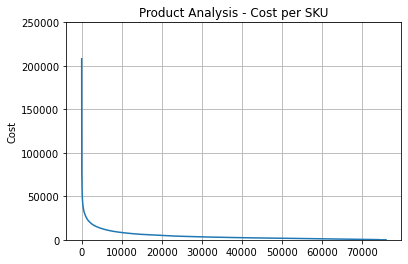

In [11]:
performance = data_sub['AddCost'].tolist()
y_pos = np.arange(len(performance))

plt.plot(y_pos, performance)
plt.ylabel('Cost')
plt.title('Product Analysis - Cost per SKU')
plt.grid(True)
plt.ylim((0,250000))
plt.show()

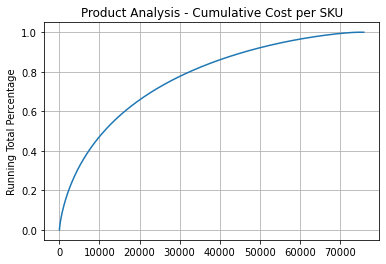

In [12]:
performance = data_sub['RunPerc'].tolist()
y_pos = np.arange(len(performance))

plt.plot(y_pos, performance)
plt.ylabel('Running Total Percentage')
plt.title('Product Analysis - Cumulative Cost per SKU')
plt.grid(True)
plt.show()